In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel(r'C:/Users/91904/Desktop/Projects/Complain_data.xlsx')

In [3]:
data.head()

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh..."
4,Debt collection,While checking my credit report I noticed thre...


In [4]:
data.shape

(125042, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125042 entries, 0 to 125041
Data columns (total 2 columns):
Product                         125042 non-null object
Consumer complaint narrative    125008 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [6]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    58413
Debt collection                                                                 23520
Credit card or prepaid card                                                     12349
Mortgage                                                                        10691
Checking or savings account                                                      7272
Student loan                                                                     4327
Vehicle loan or lease                                                            2907
Money transfer, virtual currency, or money service                               2718
Payday loan, title loan, or personal loan                                        2296
Credit reporting                                                                  166
Credit card                                                                       116
Bank account or service                               

In [7]:
column = {'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting',
          'Credit card or prepaid card':'Credit card', 'Payday loan, title loan, or personal loan':'Payday loan',
          'Money transfer, virtual currency, or money service':'Virtual currency'}

In [8]:
data['Product'] = data['Product'].map(column)

In [9]:
data.head()

,Product,Consumer complaint narrative
0,NaN,transworld systems inc. \nis trying to collect...
1,Credit reporting,I would like to request the suppression of the...
2,NaN,"Over the past 2 weeks, I have been receiving e..."
3,Virtual currency,"I was sold access to an event digitally, of wh..."
4,NaN,While checking my credit report I noticed thre...


In [10]:
data.replace(np.nan,'Other financial service', inplace=True)

In [11]:
data.head()

,Product,Consumer complaint narrative
0,Other financial service,transworld systems inc. \nis trying to collect...
1,Credit reporting,I would like to request the suppression of the...
2,Other financial service,"Over the past 2 weeks, I have been receiving e..."
3,Virtual currency,"I was sold access to an event digitally, of wh..."
4,Other financial service,While checking my credit report I noticed thre...


In [12]:
data['Product'].value_counts()

Credit reporting           58413
Other financial service    49266
Credit card                12349
Virtual currency            2718
Payday loan                 2296
Name: Product, dtype: int64

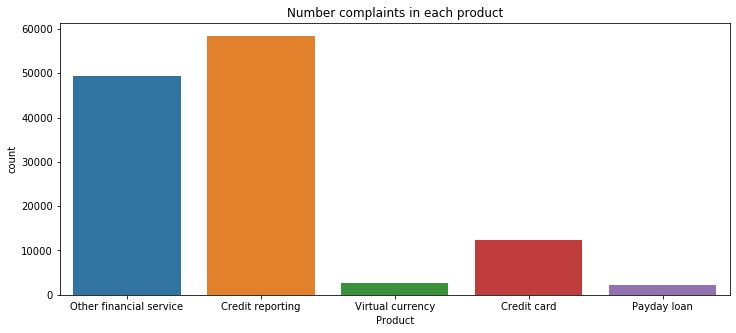

In [13]:
plt.figure(figsize=(12,5))
plt.title('Number complaints in each product')
sns.countplot(data['Product'])
plt.show()

In [14]:
def print_complaint(index):
    complaint = data[data.index == index][['Consumer complaint narrative','Product']].values[0]
    print(complaint[0])
    print('Product:', complaint[1])

In [15]:
print_complaint(10)

ALL THREE CREDIT BUREAUS ARE STILL PUTTING FRAUD ALERTS ON MY CREDIT REPORT WITHOUT MY PERMISSION. 

IT SEEMS XXXX IS THE ONE INITIATING THIS AND THEN TELLING THE OTHER BUREAUS TO FOLLOW THEIR LEAD.

THIS IS ILLEGAL, I HAVE NOT REQUESTED THAT ANY FRAUD ALERT BE PUT ON MY CREDIT FILE.

I CHALLENGE THEM ON THE FCRA SECTION 609 TO REMOVE NEGATIVE REMARKS, STATEMENTS AND CREDIT INQUIRIES THAT WERE SUPPOSED TO BE SOFT PULLS AND NOT HARD PULLS AND THESE BUREAUS TRY TO SLIDE PAST THE LAW AND PUT THESE BOGUS FRAUD ALERTS ON MY FILES TO JUSTIFY THEIR ILLEGAL ACTIVITIES. 

NO NEGATIVE REMARKS SHOULD BE ON ANY OF MY OPEN OR CLOSED ACCOUNTS. NO REMARKS STATING THAT CONSUMER DISAGREES, REINVESTIGATION IN PROGRESS, NOTHING THAT SAYS CONSUMER DISPUTES AS I AM AT THIS TIME NOT DISPUTING ANYTHING AND THESE REMARKS AND THESE FRAUD ALERTS ARE BEING PLACED ON MY FILES WITHOUT MY PERMISSION AND ARE AGAINST THE LAW.
Product: Credit reporting


In [16]:
print_complaint(50)

I received a letter from XXXX  XXXX XXXX, on behalf of US I /XXXX. Based on the information by XXXX this account was opened without my knowledge from XXXX. This account was opened fraudulently, I don't have knowledge of the transactions made. I am train to open a fraud/identity theft report as well as ftc number.
Product: Other financial service


In [17]:
print_complaint(500)

To : XXXX XXXX XXXX Complaint Resolution Manager Re : {$350000.00} wire transfer to XXXX XXXX XXXX XX/XX/2018 Dear Mr. XXXX : My name is XXXX XXXX, and I am the sender of the above referenced wire transfer to BB & T Bank. I received your reply to my previous complaint with CFPB, but, I must say, it was totally unsatisfactory. I am not asking for any account specific information. 
As I understand it, these funds are now in the possession of your Fraud Department. This wire has been recalled several times by XXXX XXXX XXXX., my broker. I ask why your bank has not complied with the several recall requests? This entire situation can be resolved simply by BB & T Bank honoring the XXXX recall requests. 
Your Fraud Department has no logical reason nor legal right as I see it to hold these funds rather than return the funds to XXXX XXXX XXXX. 
Please comply with my request and return my funds to XXXX XXXX XXXX. ASAP. Your bank 's delay is causing many problems to me in conducting my business. 

# Cleaning text.

In [18]:
import re
import nltk
from nltk.corpus import stopwords

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]'," ",text)
    text = re.sub('[^0-9a-z #+_]'," ",text)
    text = text.replace('x',' ')
    text = " ".join(word for word in text.split() if word not in set(stopwords.words('english')))
    return(text)

In [20]:
%%time
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(clean_text)

Wall time: 1h 33min 4s


In [21]:
data.head()

,Product,Consumer complaint narrative
0,Other financial service,transworld systems inc trying collect debt min...
1,Credit reporting,would like request suppression following items...
2,Other financial service,past 2 weeks receiving e cessive amounts telep...
3,Virtual currency,sold access event digitally screenshots detail...
4,Other financial service,checking credit report noticed three collectio...


In [22]:
print_complaint(50)

received letter behalf us based information account opened without knowledge account opened fraudulently knowledge transactions made train open fraud identity theft report well ftc number
Product: Other financial service


In [23]:
print_complaint(500)

complaint resolution manager 350000 00 wire transfer 2018 dear mr name sender referenced wire transfer bb bank received reply previous complaint cfpb must say totally unsatisfactory asking account specific information understand funds possession fraud department wire recalled several times broker ask bank complied several recall requests entire situation resolved simply bb bank honoring recall requests fraud department logical reason legal right see hold funds rather return funds please comply request return funds asap bank delay causing many problems conducting business thank
Product: Virtual currency


In [47]:
clean_data = data

In [48]:
clean_data.head()

,Product,Consumer complaint narrative
0,Other financial service,transworld systems inc trying collect debt min...
1,Credit reporting,would like request suppression following items...
2,Other financial service,past weeks receiving e cessive amounts teleph...
3,Virtual currency,sold access event digitally screenshots detail...
4,Other financial service,checking credit report noticed three collectio...


In [24]:
data.to_csv(r'C:/Users/91904/Desktop/Clean_Complaint_new1.csv')

In [25]:
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].str.replace('\d+', '')

In [26]:
print_complaint(500)

complaint resolution manager   wire transfer  dear mr name sender referenced wire transfer bb bank received reply previous complaint cfpb must say totally unsatisfactory asking account specific information understand funds possession fraud department wire recalled several times broker ask bank complied several recall requests entire situation resolved simply bb bank honoring recall requests fraud department logical reason legal right see hold funds rather return funds please comply request return funds asap bank delay causing many problems conducting business thank
Product: Virtual currency


In [27]:
data.head()

,Product,Consumer complaint narrative
0,Other financial service,transworld systems inc trying collect debt min...
1,Credit reporting,would like request suppression following items...
2,Other financial service,past weeks receiving e cessive amounts teleph...
3,Virtual currency,sold access event digitally screenshots detail...
4,Other financial service,checking credit report noticed three collectio...


In [28]:
data.shape()

(125042, 2)

# Creating BOW for keras.

In [29]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [30]:
max_words = 50000

In [31]:
max_sequence_lenght = 250

In [32]:
token = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True)

In [34]:
token.fit_on_texts(data['Consumer complaint narrative'].values)

In [35]:
word_index = token.word_index

In [36]:
print('Found %s unique tokens.' % len(word_index))

Found 53356 unique tokens.


In [37]:
X = token.texts_to_sequences(data['Consumer complaint narrative'].values)

In [38]:
X = pad_sequences(X, maxlen=max_sequence_lenght)

In [39]:
print('Shape:', X.shape)

Shape: (125042, 250)


In [40]:
y = pd.get_dummies(data['Product']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (125042, 5)


# Splitting the dataset.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(112537, 250) (112537, 5)
(12505, 250) (12505, 5)


# Building model.

In [43]:
from keras import Sequential
from keras.layers import Dense, SpatialDropout1D, LSTM, Embedding
from keras.callbacks import EarlyStopping

In [44]:
model = Sequential()
model.add(Embedding(max_words,100 , input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


Early stopping.

In [45]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=1)

In [57]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32,validation_split=0.3,callbacks=[es])

Train on 78775 samples, validate on 33762 samples
Epoch 1/3
78775/78775 [==============================] - 1821s 23ms/step - loss: 0.6207 - accuracy: 0.7853 - val_loss: 0.4734 - val_accuracy: 0.8370
Epoch 2/3
78775/78775 [==============================] - 3242s 41ms/step - loss: 0.4364 - accuracy: 0.8501 - val_loss: 0.4076 - val_accuracy: 0.8560
Epoch 00002: early stopping


In [58]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12505/12505 [==============================] - 49s 4ms/step
Test set
  Loss: 0.411
  Accuracy: 0.857


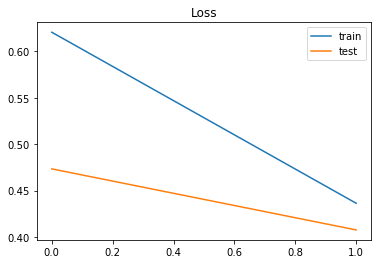

In [59]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

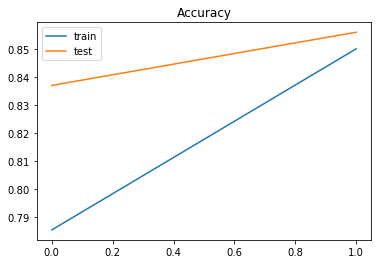

In [61]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [64]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = token.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=250)
pred = model.predict(padded)
labels = ['Credit reporting', 'Credit card', 'Virtual currency', 'Payday loan', 'Other financial service']
print(pred, labels[np.argmax(pred)])

[[1.4185560e-01 4.5238543e-01 1.0815889e-02 6.0178339e-03 3.9733961e-04]] Credit card
